# Student Score Prediction

## 1️⃣ Introduction
This dataset contains information about students and various factors affecting their academic performance.
The goal is to predict students' **final exam scores** based on features like study hours, attendance, parental involvement, previous scores, sleep hours, and participation in activities.

**Objectives:**
- Understand the relationship between study hours and final exam scores.
- Explore the impact of other factors on student performance.
- Build regression models to predict final scores and compare their performance.

## import libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (Scikit-learn)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

---

## 2️⃣ Data Loading & Cleaning

### Load the dataset and quick overview.

In [2]:
df = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
df = df[df['Exam_Score'] <= 100]

### Check for Duplicates and handle them if any

In [6]:
print(df.duplicated().sum())

0


### Check for missing values and handle them appropriately.

In [7]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [8]:
# replacing missing values with the most frequent value (mode) in each column.
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

### Ensure correct data types for all columns.

In [9]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

---

## 3️⃣ Exploratory Data Analysis (EDA)

### **Univariate Analysis:** Visualize distributions of numerical features using histograms and boxplots.

In [10]:
numerical_cols = df.select_dtypes(include=['int64']).columns.to_list()

# Automatically calculate rows and columns
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(numerical_cols) / n_cols)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

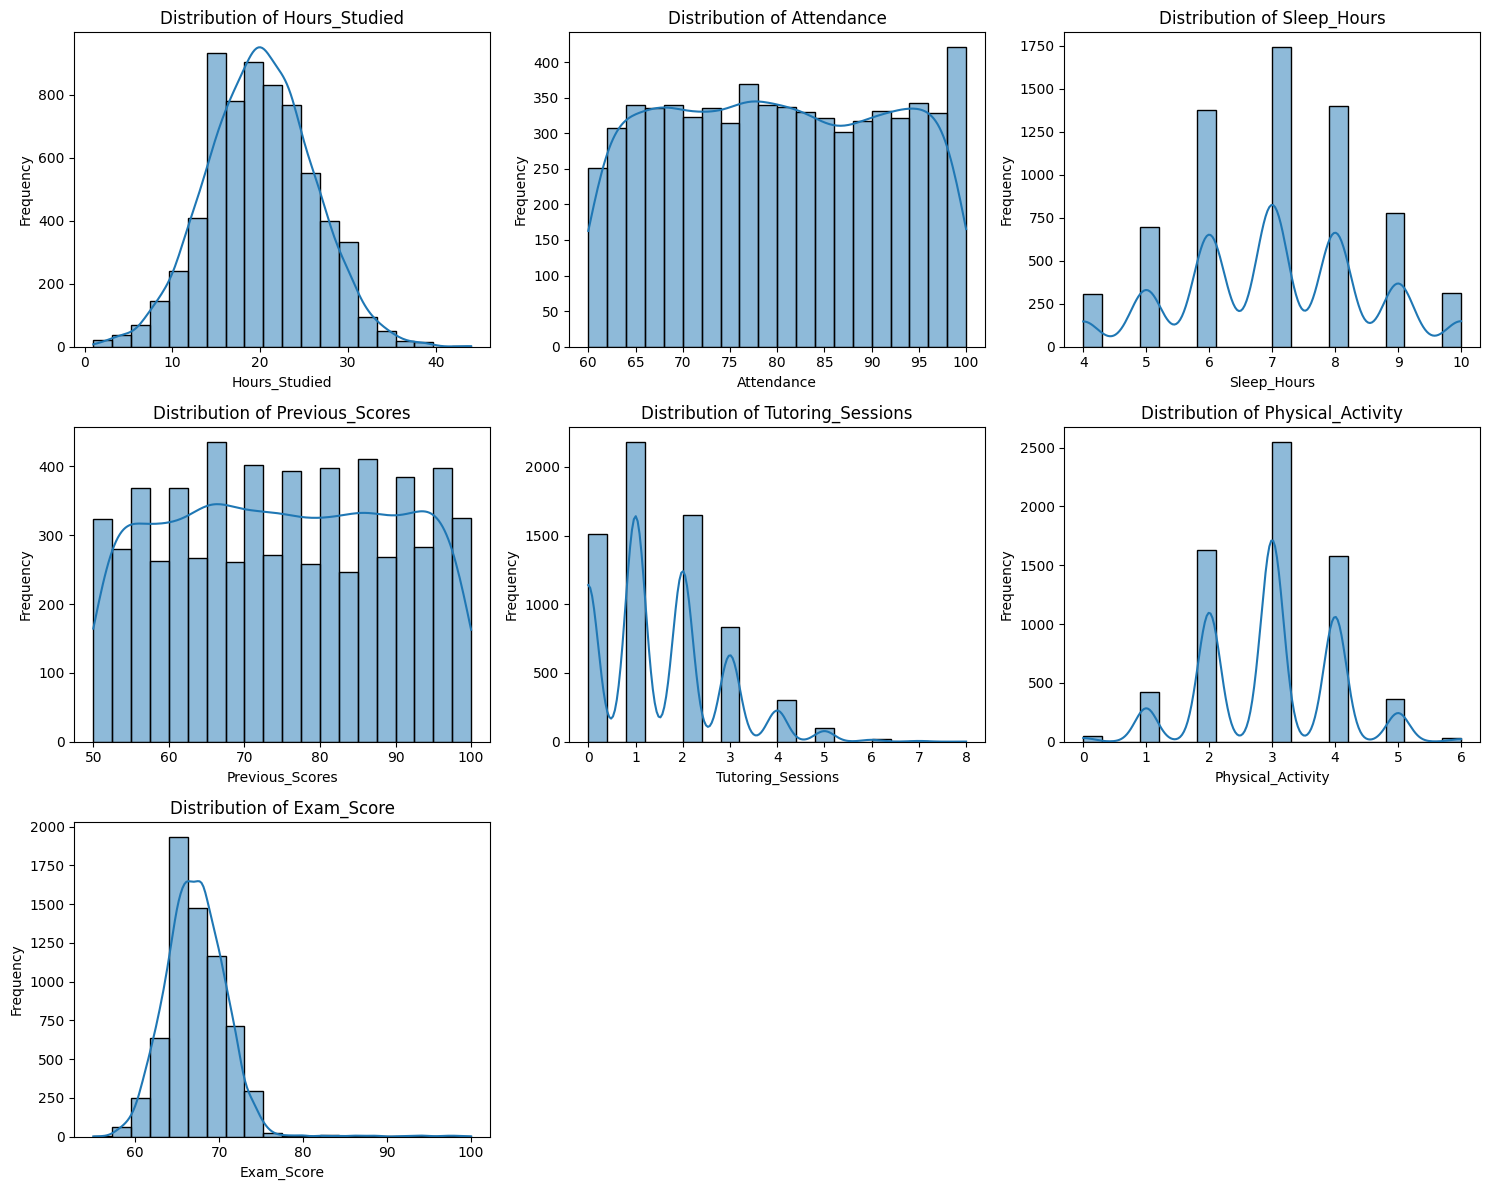

In [11]:

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if total plots < n_rows*n_cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

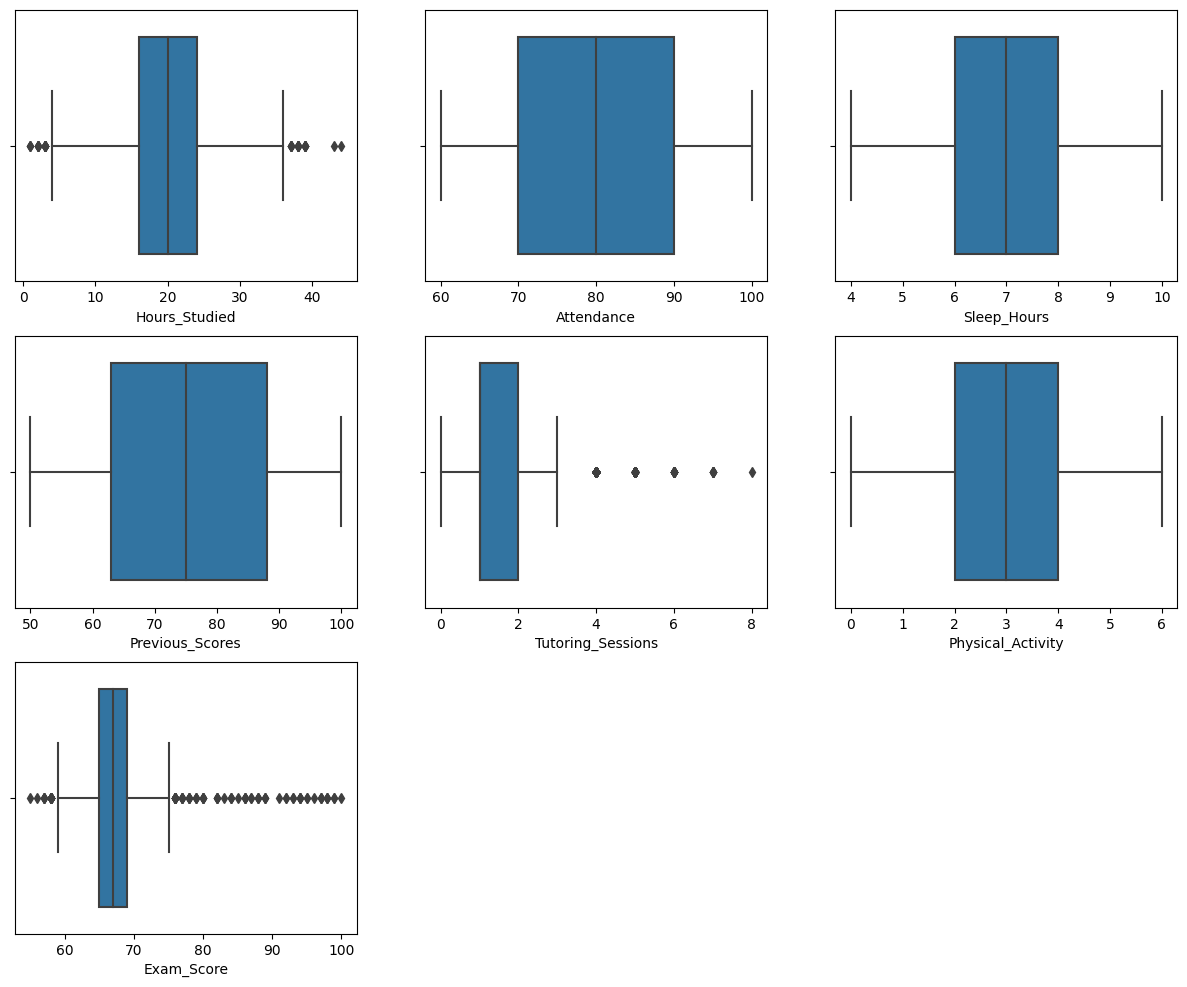

In [12]:
# Automatically calculate rows and columns
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])

# Remove any empty subplots (if total plots < n_rows*n_cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

### **Bivariate Analysis:** Explore relationships between study hours and exam scores using scatter plots.

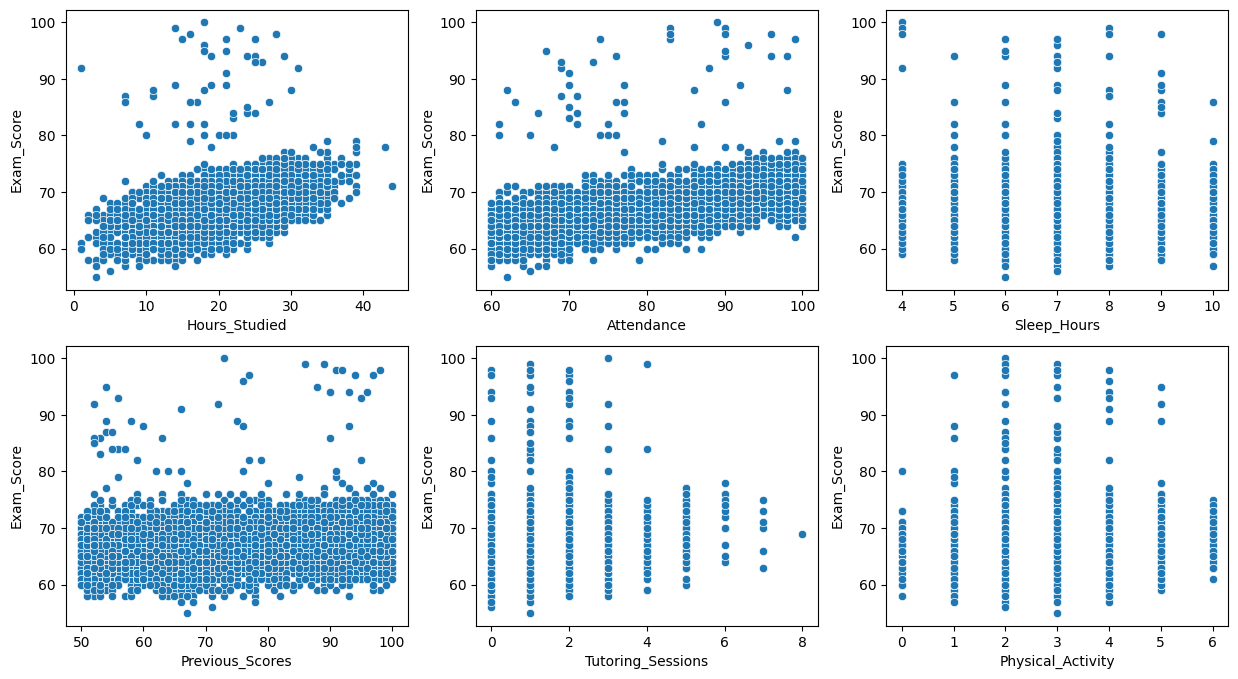

In [13]:
scatter_numerical_cols = numerical_cols.copy()
scatter_numerical_cols.remove('Exam_Score')

# Automatically calculate rows and columns
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(scatter_numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(scatter_numerical_cols):
    sns.scatterplot(x=df[col],y=df['Exam_Score'], ax=axes[i])

# Remove any empty subplots (if total plots < n_rows*n_cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

### **Univariate Analysis (Categorical):** Explore the distribution of categorical features (e.g., Gender) using count plots.

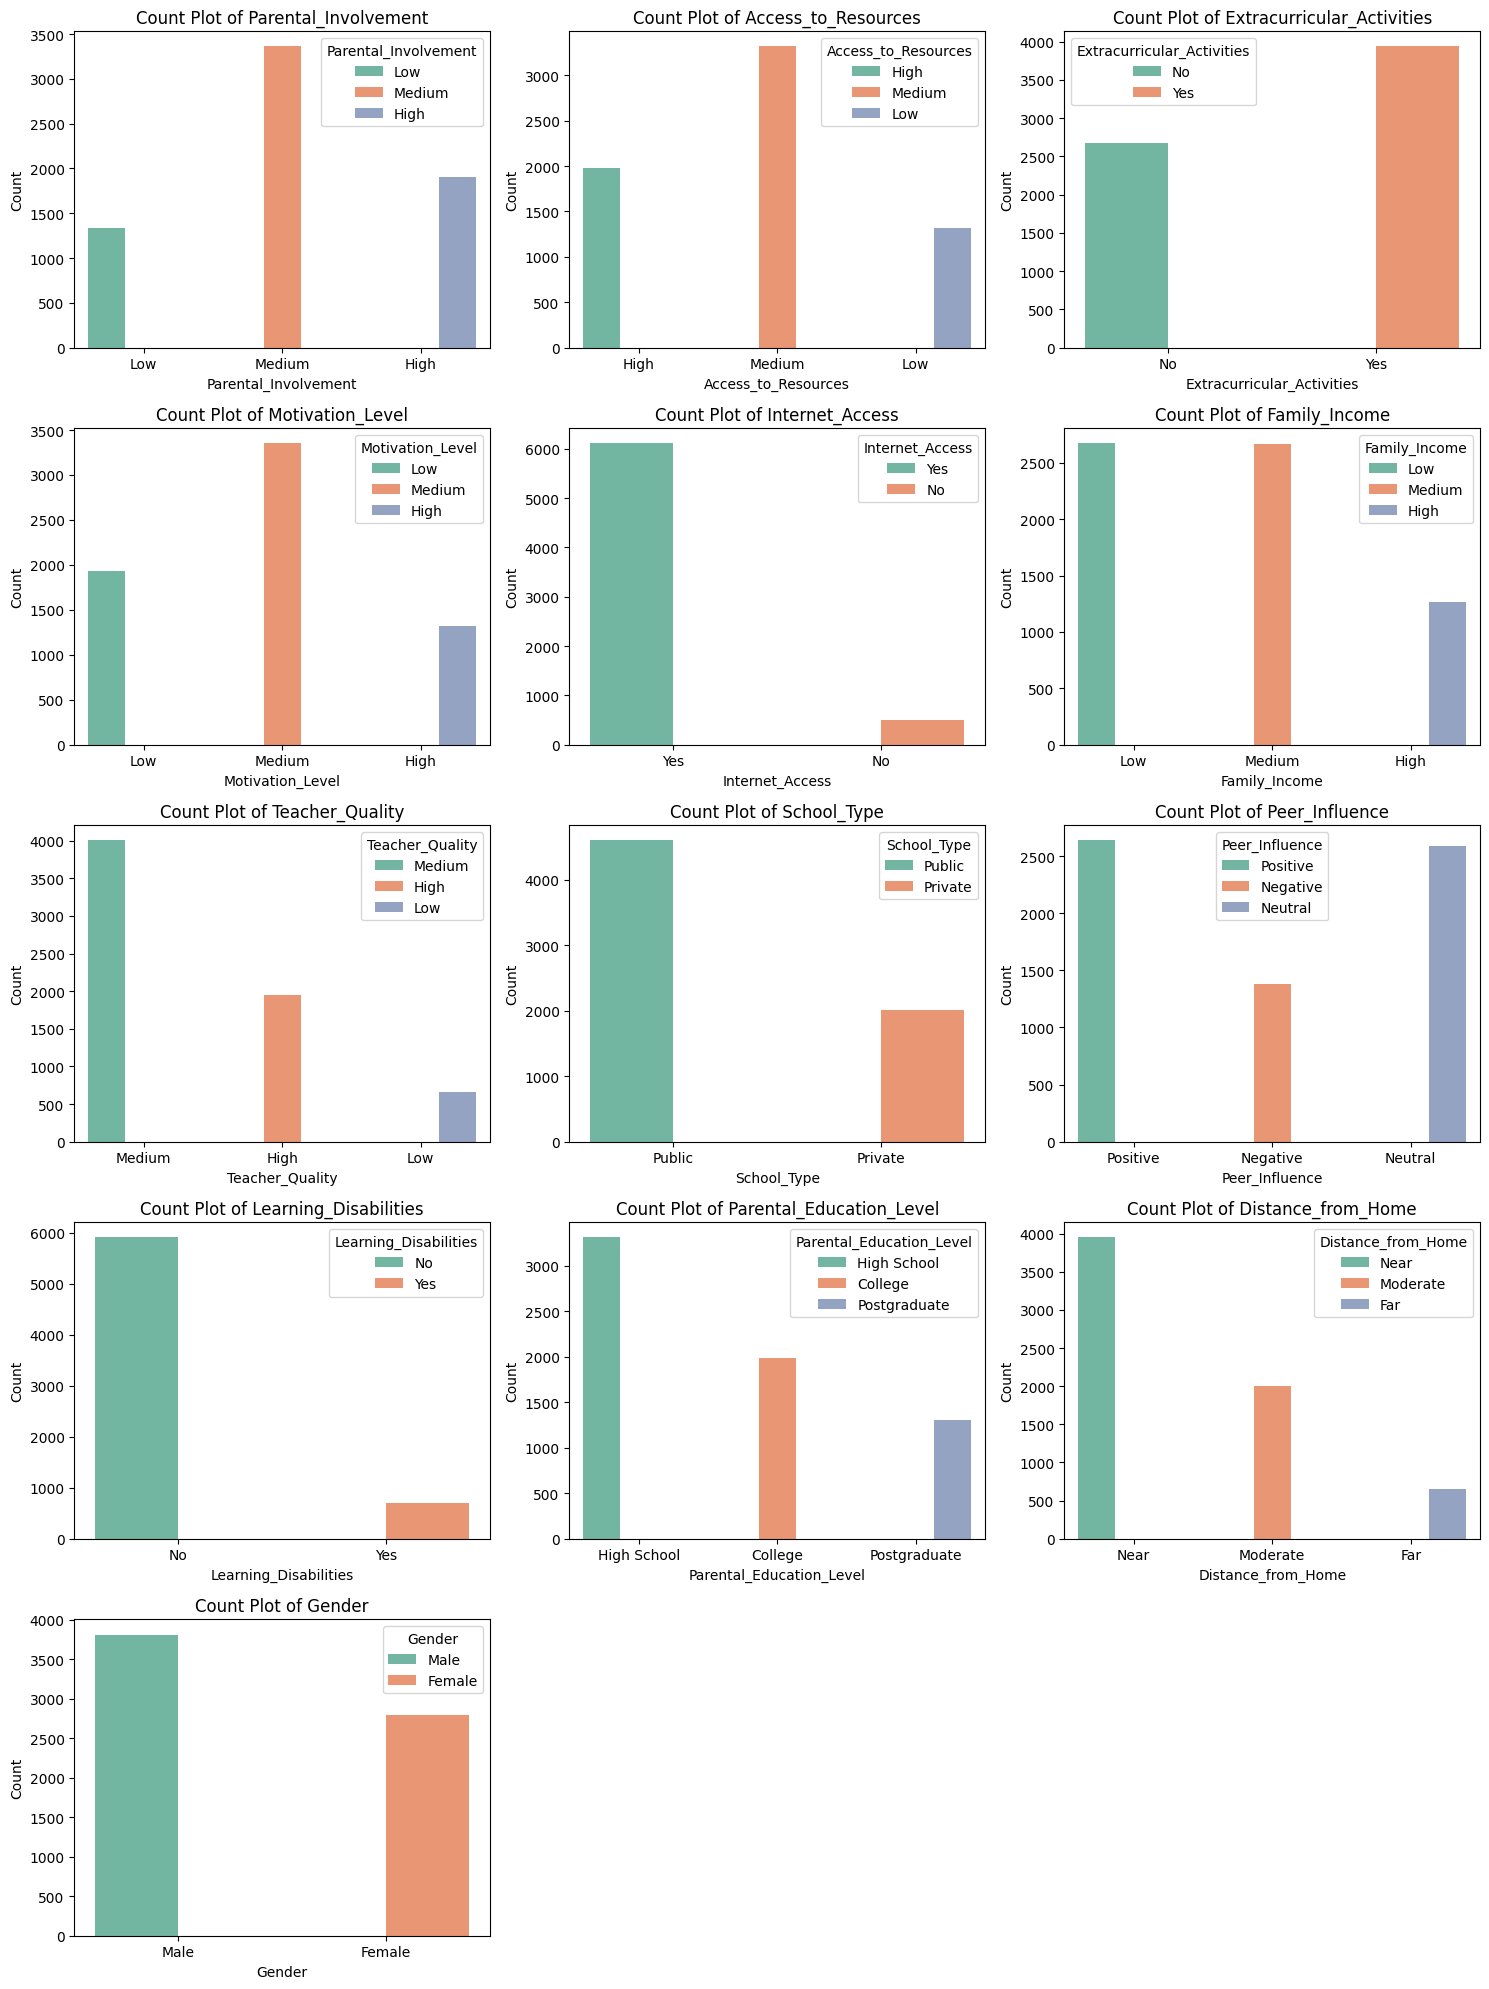

In [14]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()

# Automatically calculate rows and columns
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue=col, palette="Set2")
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")   # countplot = frequency, not "Exam Score"
    axes[i].tick_params(axis="x")  # rotate labels if too long

# Remove any empty subplots (if total plots < n_rows*n_cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **Correlation Analysis:** Use a heatmap to detect correlations between features and the target variable.

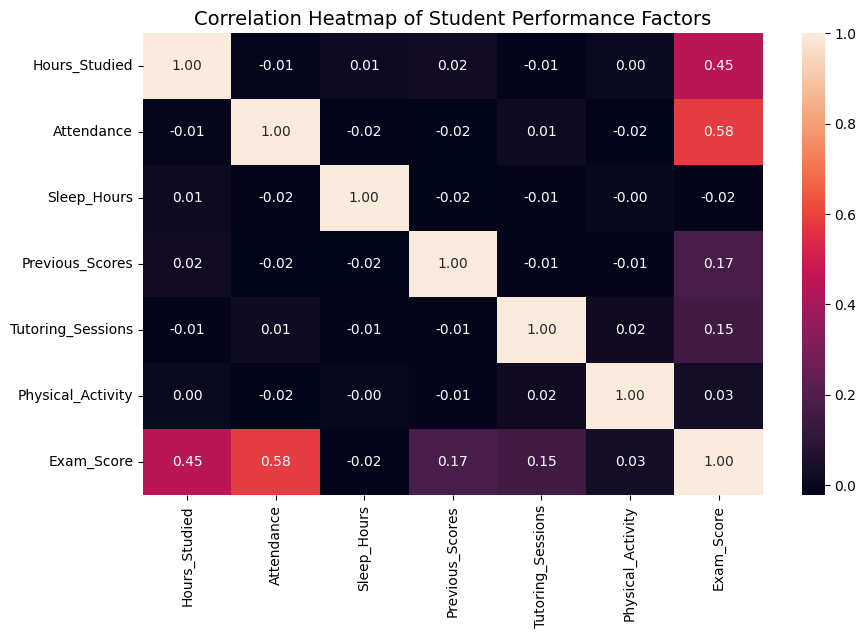

In [15]:
# Compute correlations only for numeric features.
# This helps us understand how strongly each factor relates to the exam scores and to each other
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Student Performance Factors", fontsize=14)
plt.show()

---

## 4️⃣ Feature Engineering

### Handling numerical features based on correlations

In [16]:
df.drop(['Sleep_Hours','Physical_Activity'],axis=1,inplace=True)

### Handling Categorical Features based on hypothesis testing

In [17]:
from scipy.stats import f_oneway, ttest_ind

results = []
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()

for col in categorical_features:
    groups = df[col].unique()
    if len(groups) < 2:
        continue  # Skip features with only one category

    # Collect target values for each group
    group_values = [df[df[col] == g]['Exam_Score'] for g in groups]

    # Apply t-test if binary, ANOVA if more than 2 groups
    if len(groups) == 2:
        stat, p = ttest_ind(group_values[0], group_values[1], equal_var=False)
        test_used = "t-test (Welch)"
    else:
        stat, p = f_oneway(*group_values)
        test_used = "ANOVA"

    results.append({
        "feature": col,
        "test": test_used,
        "statistic": stat,
        "p_value": p,
        "state": "Has Effect" if p < 0.05 else "No Effect"
    })
    hypothesis_results = pd.DataFrame(results).sort_values('p_value',ascending=False)

In [18]:
hypothesis_results

,feature,test,statistic,p_value,state
12,Gender,t-test (Welch),-0.040240,9.679029e-01,No Effect
7,School_Type,t-test (Welch),-0.796139,4.260005e-01,No Effect
4,Internet_Access,t-test (Welch),4.638696,4.332343e-06,Has Effect
2,Extracurricular_Activities,t-test (Welch),-5.214201,1.909647e-07,Has Effect
6,Teacher_Quality,ANOVA,19.357973,4.144671e-09,Has Effect
9,Learning_Disabilities,t-test (Welch),6.616933,6.506120e-11,Has Effect
3,Motivation_Level,ANOVA,27.142531,1.821126e-12,Has Effect
11,Distance_from_Home,ANOVA,27.226757,1.675174e-12,Has Effect
5,Family_Income,ANOVA,28.779221,3.593386e-13,Has Effect
8,Peer_Influence,ANOVA,33.565202,3.136320e-15,Has Effect


In [19]:
df.drop(hypothesis_results[hypothesis_results['state'] == 'No Effect']['feature'],axis=1,inplace=True)

### Encoding categorical features

In [20]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,...,Family_Income_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near
0,23,84,73,0,67,True,False,False,False,False,...,False,False,True,False,True,False,True,False,False,True
1,19,64,59,2,61,True,False,False,True,False,...,True,False,True,False,False,False,False,False,True,False
2,24,98,91,2,74,False,True,False,True,True,...,True,False,True,True,False,False,False,True,False,True
3,29,89,98,1,71,True,False,False,True,True,...,True,False,True,False,False,False,True,False,True,False
4,19,92,65,3,70,False,True,False,True,True,...,True,False,False,True,False,False,False,False,False,True


### Scaling

In [21]:
scaler = StandardScaler()
for col in ['Hours_Studied','Attendance', 'Previous_Scores', 'Tutoring_Sessions']:
    df_encoded[col] = scaler.fit_transform(df_encoded[[col]])

In [22]:
df_encoded.head()

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,...,Family_Income_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near
0,0.505133,0.348650,-0.143617,-1.214158,67,True,False,False,False,False,...,False,False,True,False,True,False,True,False,False,True
1,-0.162650,-1.383650,-1.115968,0.412105,61,True,False,False,True,False,...,True,False,True,False,False,False,False,False,True,False
2,0.672079,1.561259,1.106548,0.412105,74,False,True,False,True,True,...,True,False,True,True,False,False,False,True,False,True
3,1.506808,0.781725,1.592723,-0.401027,71,True,False,False,True,True,...,True,False,True,False,False,False,True,False,True,False
4,-0.162650,1.041570,-0.699247,1.225236,70,False,True,False,True,True,...,True,False,False,True,False,False,False,False,False,True


## 5️⃣ Model Building

In [23]:
# Features & target
X = df_encoded.drop(columns=["Exam_Score"])
y = df_encoded["Exam_Score"]
y_log = np.log(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log , test_size=0.2, random_state=42
)

### Removing outliers from Training data

In [24]:
# Select only numeric columns (int or float)
numeric_cols = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']

for col in numeric_cols:
    Q1 = X_train[col].quantile(0.25)        # First quartile (25%)
    Q3 = X_train[col].quantile(0.75)        # Third quartile (75%)
    IQR = Q3 - Q1                           # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if any outliers exist in this column
    if ((X_train[col] < lower_bound) | (X_train[col] > upper_bound)).any():
        # Clip outliers into the valid range
        X_train[col] = X_train[col].clip(lower=lower_bound, upper=upper_bound)

# y-train
Q1 = y_train.quantile(0.25)        # First quartile (25%)
Q3 = y_train.quantile(0.75)        # Third quartile (75%)
IQR = Q3 - Q1                      # Interquartile Range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check if any outliers exist in this column
if ((y_train < lower_bound) | (y_train > upper_bound)).any():
    # Clip outliers into the valid range
    y_train = y_train.clip(lower=lower_bound, upper=upper_bound)

### Linear Regression Model

In [25]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)

print("---- Linear Regression ----")
print("Train R²:", r2_score(y_train, y_train_pred))

---- Linear Regression ----
Train R²: 0.9197256092310225


### Polynomial Regression Model

In [26]:
poly_model = PolynomialFeatures(degree=2, include_bias=False)

X_poly_train = poly_model.fit_transform(X_train)

X_poly_test = poly_model.transform(X_test)

poly_reg = LinearRegression()

poly_reg.fit(X_poly_train, y_train)

poly_reg.fit(X_poly_train,y_train)

pred = poly_reg.predict(X_poly_train)
print("---- Polynomial Regression ----")
print("Train R²:", r2_score(y_train, pred))

---- Polynomial Regression ----
Train R²: 0.9241612222938491


## 6️⃣ Evaluation

### Cross-validation

In [27]:
scores_lin = cross_val_score(linear_model, X_train, y_train, cv=5, scoring="r2")
scores_poly = cross_val_score(
    Pipeline([("poly", PolynomialFeatures(degree=2, include_bias=False)),
              ("model", LinearRegression())]),
    X_train, y_train, cv=5, scoring="r2"
)

print("Linear CV R² mean:", np.mean(scores_lin), "±", np.std(scores_lin))
print("Polynomial CV R² mean:", np.mean(scores_poly), "±", np.std(scores_poly))

Linear CV R² mean: 0.9190549134677006 ± 0.03036701209993075
Polynomial CV R² mean: 0.9121489925155452 ± 0.03035222658321915


### Testing Accuracy

In [28]:
y_pred_lin = linear_model.predict(X_test)

print("---- Linear Regression ----")
print("Test R² :", r2_score(y_test,y_pred_lin))
print("RMSE    :", mean_squared_error(y_test, y_pred_lin))
print("MAE     :", mean_absolute_error(y_test, y_pred_lin))

---- Linear Regression ----
Test R² : 0.8584009775518204
RMSE    : 0.00039932676853495554
MAE     : 0.006642628271215364


In [29]:
y_pred_poly = poly_reg.predict(X_poly_test)

print("---- Polynomial Regression ----")
print("Test R² :",r2_score(y_test, y_pred_poly))
print("RMSE    :", mean_squared_error(y_test, y_pred_poly))
print("MAE     :", mean_absolute_error(y_test, y_pred_poly))

---- Polynomial Regression ----
Test R² : 0.8552489478407196
RMSE    : 0.000408215882436294
MAE     : 0.007268410668327179


## 7️⃣ Visualization

### Plot **predicted vs actual scores** to check **Linear Regresssion** model fit.

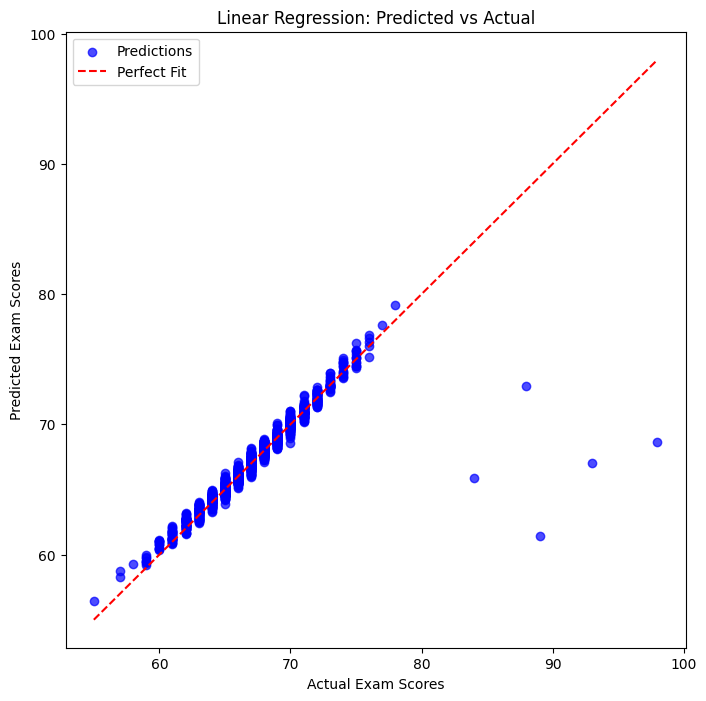

In [30]:
plt.figure(figsize=(8,8))

# Scatter plot of actual vs predicted scores
plt.scatter(np.exp(y_test), np.exp(y_pred_lin), alpha=0.7, color="blue", label="Predictions")

# Perfect fit reference line (y = x)
plt.plot(
    [np.exp(y_test.min()), np.exp(y_test.max())],
    [np.exp(y_test.min()), np.exp(y_test.max())],
    color="red", linestyle="--", label="Perfect Fit"
)

# Labels and title
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Linear Regression: Predicted vs Actual")

# Legend and show
plt.legend()
plt.show()

### Plot **predicted vs actual scores** to check **Polynomial Regresssion** model fit.

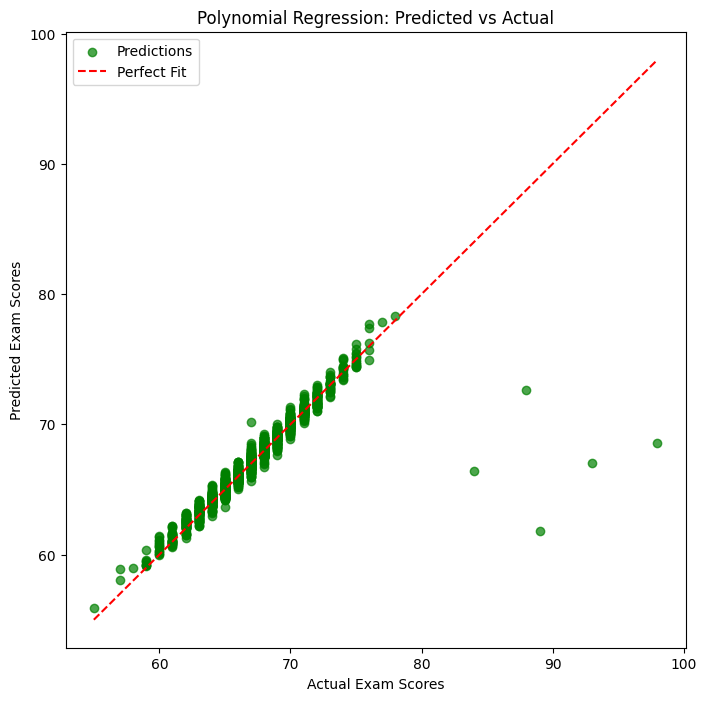

In [31]:
plt.figure(figsize=(8,8))

# Scatter plot in original scale
plt.scatter(np.exp(y_test), np.exp(y_pred_poly), alpha=0.7, color="green", label="Predictions")

# Perfect fit line in original scale
plt.plot(
    [np.exp(y_test.min()), np.exp(y_test.max())],
    [np.exp(y_test.min()), np.exp(y_test.max())],
    color="red", linestyle="--", label="Perfect Fit"
)

plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Polynomial Regression: Predicted vs Actual")
plt.legend()
plt.show()


###  Residuals plot

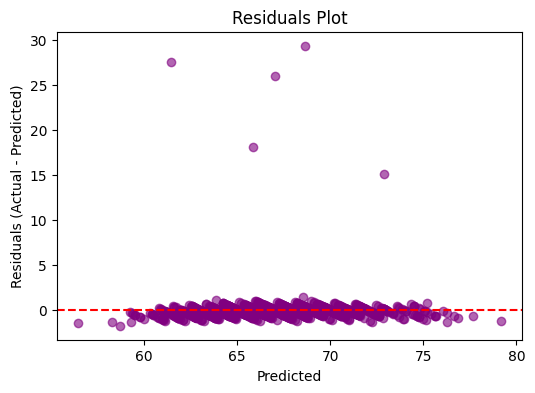

In [32]:
residuals = np.exp(y_test) -  np.exp(y_pred_lin)
plt.figure(figsize=(6,4))
plt.scatter(np.exp(y_pred_lin), residuals, alpha=0.6, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()

## Conclusion

- The project successfully built models to predict student exam scores based on study hours and other factors.
- Data cleaning, exploratory data analysis, and feature engineering helped improve model quality by selecting relevant features and handling outliers.
- The linear regression model performed well with an R-squared of approximately 0.86 on the test set, indicating a good fit.
- Polynomial regression with degree 2 was also evaluated but did not significantly perform better than the linear model.
- Future work could involve experimenting with regularization methods, adding interaction terms, or exploring more complex models.
- Overall, the project demonstrates the effective use of regression techniques for educational data prediction tasks.